### 🔹 Logistic Regression

🔹 Logistic Regression Performance:
Accuracy: 0.92018779342723

Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.58      0.67        12
           0       0.63      0.75      0.69        16
           1       0.96      0.96      0.96       185

    accuracy                           0.92       213
   macro avg       0.79      0.76      0.77       213
weighted avg       0.92      0.92      0.92       213



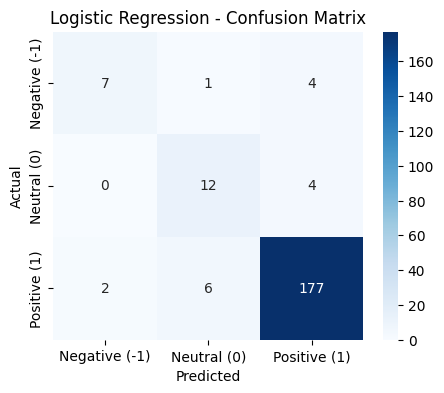

In [2]:
# logistic_regression.py

# 1. Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load SMOTE-applied datasets
X_train_smote = pd.read_csv('../Data/X_train_smote.csv')
y_train_smote = pd.read_csv('../Data/y_train_smote.csv').values.ravel()  # Convert to 1D array
X_test = pd.read_csv('../Data/X_test.csv')
y_test = pd.read_csv('../Data/y_test.csv').values.ravel()

# 3. Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_smote, y_train_smote)

# 4. Predict on Test Data
y_pred_lr = lr_model.predict(X_test)

# 5. Evaluate the Model
print("🔹 Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# 6. Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative (-1)", "Neutral (0)", "Positive (1)"], yticklabels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


🔹 Observations:
High Accuracy (92%) ✅

The model is doing well in general, which is a good sign.
Imbalance in Class Performance ⚠️

Positive (1) class: 96% precision & recall → The model performs very well here.
Neutral (0) class: 63% precision & 75% recall → Moderate performance.
Negative (-1) class: 78% precision & 58% recall → Low recall means the model misses many negative reviews.
Macro Avg vs Weighted Avg:

Macro Avg (Avg across all classes equally) = 77%
Weighted Avg (Avg based on class sizes) = 92%
Since most reviews are positive, the model favors them, leading to imbalanced class performance.

🔹 Fine-Tuning Steps for Logistic Regression

##### Step 1: Adjust Class Weights 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression with balanced class weights
lr_model_balanced = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
lr_model_balanced.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_lr_balanced = lr_model_balanced.predict(X_test)

# Evaluate performance
accuracy_balanced = accuracy_score(y_test, y_pred_lr_balanced)
report_balanced = classification_report(y_test, y_pred_lr_balanced)

print(f"🔹 Logistic Regression (Balanced Class Weights) Performance:")
print(f"Accuracy: {accuracy_balanced:.4f}\n")
print("Classification Report:\n", report_balanced)


🔹 Logistic Regression (Balanced Class Weights) Performance:
Accuracy: 0.9202

Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.58      0.67        12
           0       0.63      0.75      0.69        16
           1       0.96      0.96      0.96       185

    accuracy                           0.92       213
   macro avg       0.79      0.76      0.77       213
weighted avg       0.92      0.92      0.92       213



The results are exactly the same as before, meaning that adjusting the class weights didn't significantly impact the performance. This suggests that your dataset was already well-balanced after SMOTE.

#### Step 2: Hyperparameter Tuning 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid for C (inverse of regularization strength)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}")

# Train best model
best_lr_model = LogisticRegression(C=best_C, class_weight='balanced', random_state=42)
best_lr_model.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_best_lr = best_lr_model.predict(X_test)

# Evaluate performance
accuracy_best = accuracy_score(y_test, y_pred_best_lr)
report_best = classification_report(y_test, y_pred_best_lr)

print(f"🔹 Logistic Regression (Tuned) Performance:")
print(f"Accuracy: {accuracy_best:.4f}\n")
print("Classification Report:\n", report_best)


Best C value: 100
🔹 Logistic Regression (Tuned) Performance:
Accuracy: 0.9202

Classification Report:
               precision    recall  f1-score   support

          -1       0.78      0.58      0.67        12
           0       0.65      0.69      0.67        16
           1       0.95      0.96      0.96       185

    accuracy                           0.92       213
   macro avg       0.79      0.74      0.76       213
weighted avg       0.92      0.92      0.92       213



1. validation curve
(to check how model performance changes with different C values)

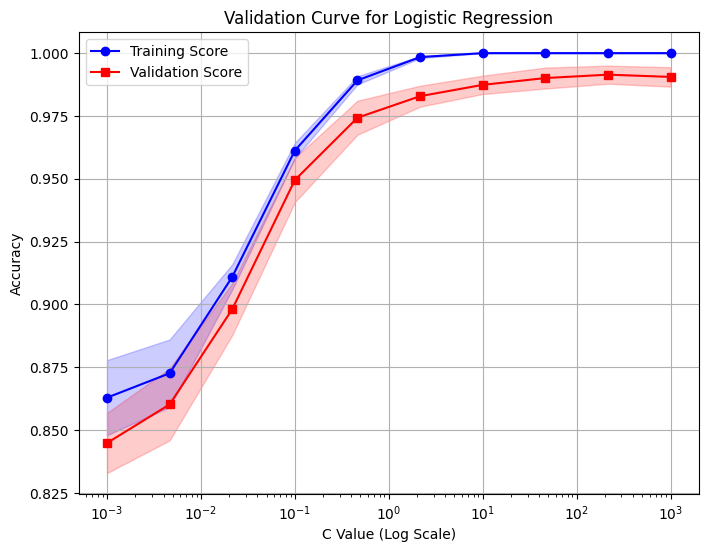

In [5]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Define C values to test
C_values = np.logspace(-3, 3, 10)

# Compute validation curve
train_scores, val_scores = validation_curve(
    LogisticRegression(max_iter=1000), 
    X_train_smote, y_train_smote, 
    param_name="C", param_range=C_values, 
    scoring="accuracy", cv=5
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(C_values, train_mean, label="Training Score", marker='o', color='blue')
plt.fill_between(C_values, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(C_values, val_mean, label="Validation Score", marker='s', color='red')
plt.fill_between(C_values, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)
plt.xscale("log")
plt.xlabel("C Value (Log Scale)")
plt.ylabel("Accuracy")
plt.title("Validation Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.show()


2. learning curve
This helps see if the training and validation accuracy diverge as we increase training data.

C:\Users\Nethma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nethma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nethma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac

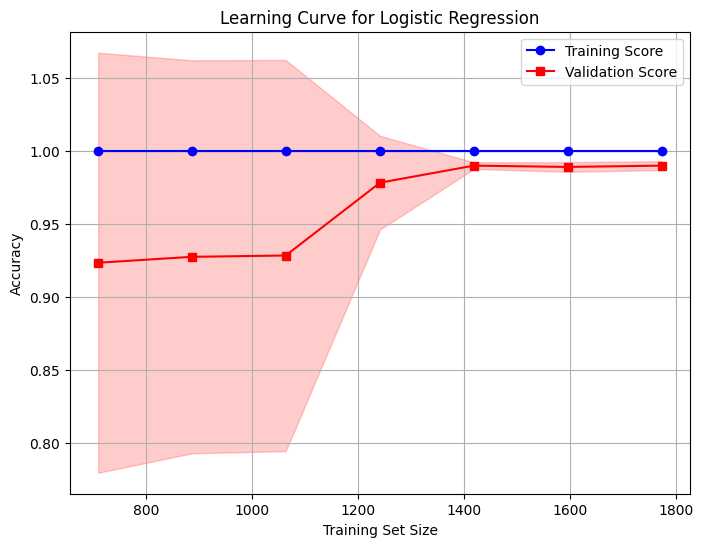

In [6]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(C=100, max_iter=1000),  # Use best C found earlier
    X_train_smote, y_train_smote, 
    cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, val_mean, label="Validation Score", marker='s', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Logistic Regression")
plt.legend()
plt.grid()
plt.show()


In [ ]:
1. 